# Install and Import Dependencies

In [1]:
!pip3 install torch torchvision torchaudio

  Obtaining dependency information for torchvision from https://files.pythonhosted.org/packages/36/15/c48f74f8f8d382677ef016b65f09969028a1549b8a518c18894deb95b544/torchvision-0.17.2-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for torchaudio from https://files.pythonhosted.org/packages/3f/6f/79fe2cb91908b3d3a57b8ef68911123f797c0fb05a268a6da86cc5a67484/torchaudio-2.2.2-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for torch from https://files.pythonhosted.org/packages/96/23/18b9c16c18a77755e7f15173821c7100f11e6b3b7717bea8d729bdeb92c0/torch-2.2.2-cp311-none-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for typing-extensions>=4.8.0 from https://files.pythonhosted.org/packages/01/f3/936e209267d6ef7510322191003885de524fc48d1b43269810cd589ceaf5/typing_extensions-4.11.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 469.7 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━

In [12]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [1]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

# Load Model

In [10]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in /Users/vishnu/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-4-18 Python-3.11.4 torch-2.2.2 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [3]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

# Make Detections

In [4]:
img = 'messi.png'
results = model(img)
results.print()

image 1/1: 1334x750 4 persons, 1 car
Speed: 57.5ms pre-process, 92.9ms inference, 0.7ms NMS per image at shape (1, 3, 640, 384)


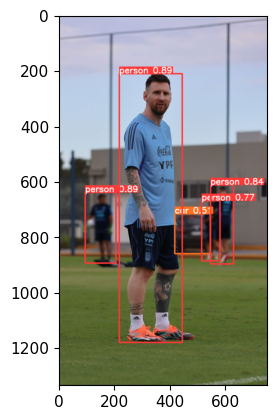

In [5]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [6]:
np.squeeze(results.render()).shape

(1334, 750, 3)

# Real time detections

In [7]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    #Make detections
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

# Train 

In [2]:
import uuid #Unique identifier
import os
import time

In [4]:
IMAGES_PATH = os.path.join('data', 'images')
labels = ['awake', 'drowsy']
number_imgs = 20

In [9]:
for label in labels:
    print("Collecting images for {}".format(label))
    for i in range(number_imgs):
        print("collecting images for {}, image number {}".format(label, i))

collecting images for awake, image number 0
collecting images for awake, image number 1
collecting images for awake, image number 2
collecting images for awake, image number 3
collecting images for awake, image number 4
collecting images for awake, image number 5
collecting images for awake, image number 6
collecting images for awake, image number 7
collecting images for awake, image number 8
collecting images for awake, image number 9
collecting images for awake, image number 10
collecting images for awake, image number 11
collecting images for awake, image number 12
collecting images for awake, image number 13
collecting images for awake, image number 14
collecting images for awake, image number 15
collecting images for awake, image number 16
collecting images for awake, image number 17
collecting images for awake, image number 18
collecting images for awake, image number 19
collecting images for drowsy, image number 0
collecting images for drowsy, image number 1
collecting images fo

In [5]:
cap = cv2.VideoCapture(0)
for label in labels:
    print("Collecting images for {}".format(label))
    time.sleep(5)
    for img_num in range(number_imgs):
        print("Collecting image for {}, image number {}".format(label, img_num))
        
        ret, frame = cap.read()
        
        imgname = os.path.join(IMAGES_PATH, label + "." + str(uuid.uuid1()) + ".jpg")
        cv2.imwrite(imgname, frame)
        cv2.imshow('Image Collection', frame)
        time.sleep(2)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

2024-04-18 10:07:39.113 python[1176:21719] IMKClient Stall detected, *please Report* your user scenario attaching a spindump (or sysdiagnose) that captures the problem - (imkxpc_bundleIdentifierWithReply:) block performed very slowly (2.05 secs).


In [10]:
os.listdir('data')

['.DS_Store', 'images']

In [9]:
os.listdir('data/images')

['awake.74a6463c-f810-11ee-9c9b-0efa02267dc4.jpg',
 'awake.69afe706-f810-11ee-9c9b-0efa02267dc4.jpg',
 'drowsy.846b49b4-f810-11ee-9c9b-0efa02267dc4.jpg',
 'drowsy.930918c0-f810-11ee-9c9b-0efa02267dc4.jpg',
 'drowsy.96b0d7e2-f810-11ee-9c9b-0efa02267dc4.jpg',
 'awake.784de934-f810-11ee-9c9b-0efa02267dc4.jpg',
 'awake.70fec748-f810-11ee-9c9b-0efa02267dc4.jpg',
 'awake.767a19d4-f810-11ee-9c9b-0efa02267dc4.jpg',
 'drowsy.80c3beb8-f810-11ee-9c9b-0efa02267dc4.jpg',
 'drowsy.8bba546c-f810-11ee-9c9b-0efa02267dc4.jpg',
 'drowsy.94dce316-f810-11ee-9c9b-0efa02267dc4.jpg',
 'awake.574c027a-f810-11ee-9c9b-0efa02267dc4.jpg',
 'awake.5eb40f26-f810-11ee-9c9b-0efa02267dc4.jpg',
 'drowsy.7eeff412-f810-11ee-9c9b-0efa02267dc4.jpg',
 'awake.59338cac-f810-11ee-9c9b-0efa02267dc4.jpg',
 'awake.6f2b1c0a-f810-11ee-9c9b-0efa02267dc4.jpg',
 'drowsy.a1a742ee-f810-11ee-9c9b-0efa02267dc4.jpg',
 'drowsy.9dffbe00-f810-11ee-9c9b-0efa02267dc4.jpg',
 'awake.6087fc04-f810-11ee-9c9b-0efa02267dc4.jpg',
 'drowsy.863f0604-f810

In [11]:
!git clone https://github.com/HumanSignal/labelImg

Cloning into 'labelImg'...
remote: Enumerating objects: 2097, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 2097 (delta 0), reused 4 (delta 0), pack-reused 2090
Receiving objects: 100% (2097/2097), 237.14 MiB | 8.27 MiB/s, done.
Resolving deltas: 100% (1245/1245), done.


In [12]:
!pip3 install pyqt5 lxml --upgrade

  Obtaining dependency information for pyqt5 from https://files.pythonhosted.org/packages/7c/1a/10bfde9464f2521d907c1fc675eaa33bab014fca4a9502ac3995a9b76549/PyQt5-5.15.10-cp37-abi3-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for lxml from https://files.pythonhosted.org/packages/43/43/66a84c2a034f5df2782240cb2f68696a72ad6734d7a91f824e0360cde08b/lxml-5.2.1-cp311-cp311-macosx_10_9_universal2.whl.metadata
  Obtaining dependency information for PyQt5-sip<13,>=12.13 from https://files.pythonhosted.org/packages/bc/de/fff654a38821e42beb914ecca72c4ac0ae3dab1f94666ae8015a152a197f/PyQt5_sip-12.13.0-cp311-cp311-macosx_10_9_universal2.whl.metadata
  Obtaining dependency information for PyQt5-Qt5>=5.15.2 from https://files.pythonhosted.org/packages/c9/8b/4441c208c8ca29b50fab6467ebfa32b6401d16c5c915a031a48dc85dfa7a/PyQt5_Qt5-5.15.13-py3-none-macosx_11_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 5.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━

In [3]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yaml --weights yolov5s.pt --workers 2

train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=500, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: skipping check (offline), for updates see https://github.com/ultralytics/yolov5
fatal: cannot change to '/Users/vishnu/Documents/Embedded': No such file or directory
YOLOv5 🚀 2024-4-11 Python-3.11.4 torch-2.2.2 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warm


      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      9/499         0G    0.06385    0.01727    0.03433         36        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         80         80      0.258      0.916      0.293      0.109

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     10/499         0G      0.065    0.01845    0.03276         42        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         80         80      0.172      0.879      0.206      0.093

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     11/499         0G    0.06718    0.01572    0.03333         31        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         80         80      0.298      0.791      0.452      0.185

      Epo


      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     34/499         0G    0.04474    0.01223    0.03105         37        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         80         80      0.246      0.868      0.503      0.169

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     35/499         0G    0.03844    0.01376    0.03017         35        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         80         80      0.422      0.897      0.626      0.425

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     36/499         0G    0.05504    0.01233    0.02973         40        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         80         80      0.333      0.897       0.53      0.272

      Epo


      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     59/499         0G    0.03092   0.009694    0.02552         40        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         80         80      0.932      0.969      0.968      0.342

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     60/499         0G    0.04318    0.01006    0.02175         31        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         80         80      0.817       0.97      0.935      0.587

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     61/499         0G    0.03591   0.008974    0.02235         32        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         80         80      0.961      0.991      0.989      0.383

      Epo


      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     84/499         0G    0.03246   0.008696    0.01349         31        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         80         80       0.83      0.882      0.967      0.751

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     85/499         0G    0.02943   0.009043    0.01425         43        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         80         80      0.782      0.887      0.932      0.604

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     86/499         0G    0.03023   0.008264    0.01373         32        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         80         80      0.883      0.927      0.975      0.648

      Epo


      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    109/499         0G     0.0253   0.007982    0.01445         34        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         80         80      0.973      0.987      0.989      0.827

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    110/499         0G    0.02429   0.008204    0.01427         43        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         80         80      0.899       0.95      0.986      0.768

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    111/499         0G    0.02318   0.007426    0.01582         45        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         80         80      0.953      0.989      0.994      0.798

      Epo


      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    134/499         0G    0.02347   0.006784    0.01116         34        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         80         80      0.948      0.983      0.994      0.803

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    135/499         0G    0.01885   0.006742    0.01529         27        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         80         80      0.967      0.989      0.995      0.724

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    136/499         0G    0.02568   0.006881    0.01087         33        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         80         80      0.979      0.989      0.995      0.779

      Epo


      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    159/499         0G    0.01873   0.007194    0.01101         45        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         80         80       0.96      0.949      0.994      0.869

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    160/499         0G    0.02696   0.006815    0.01349         26        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         80         80      0.985      0.978      0.995      0.802

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    161/499         0G    0.02243   0.006587   0.009841         34        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         80         80      0.997      0.982      0.995      0.886

      Epo


      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    184/499         0G     0.0242   0.007212    0.01071         35        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         80         80      0.993          1      0.995      0.844

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    185/499         0G    0.02105   0.007053    0.00974         33        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         80         80      0.994          1      0.995      0.799

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    186/499         0G    0.01988   0.006851   0.009116         35        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         80         80      0.993          1      0.995      0.833

      Epo

# Load Custom Model

In [3]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path = 'yolov5/runs/train/exp14/weights/last.pt', force_reload = True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /Users/vishnu/.cache/torch/hub/master.zip
YOLOv5 🚀 2024-4-18 Python-3.11.4 torch-2.2.2 CPU

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [4]:
img = os.path.join('data', 'images', 'drowsy.94240838-fcd8-11ee-8454-0efa02267dc5.jpg')
results = model(img)
results.print()

image 1/1: 720x1280 1 awake, 1 drowsy
Speed: 26.1ms pre-process, 90.1ms inference, 0.5ms NMS per image at shape (1, 3, 384, 640)


In [4]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    #Make detections
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()